Module imports

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import seaborn.objects as so
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


Dataset overview

In [3]:
df = pd.read_csv("loandataset.csv")
df.sample(10)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
324,LP002065,Male,Yes,3+,Graduate,No,15000,0.0,300.0,360.0,1.0,Rural,Y
361,LP002170,Male,Yes,2,Graduate,No,5000,3667.0,236.0,360.0,1.0,Semiurban,Y
174,LP001603,Male,Yes,0,Not Graduate,Yes,4344,736.0,87.0,360.0,1.0,Semiurban,N
214,LP001716,Male,Yes,0,Graduate,No,3173,3021.0,137.0,360.0,1.0,Urban,Y
167,LP001578,Male,Yes,0,Graduate,No,2439,3333.0,129.0,360.0,1.0,Rural,Y
39,LP001116,Male,No,0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban,Y
437,LP002401,Male,Yes,0,Graduate,No,2213,1125.0,NaN,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
518,LP002683,Male,No,0,Graduate,No,4683,1915.0,185.0,360.0,1.0,Semiurban,N
330,LP002097,Male,No,1,Graduate,No,4384,1793.0,117.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum().sort_values(ascending = False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

EDA

In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df['Credit_History'] = df['Credit_History'].astype('str')
df['CoapplicantIncome'] = df['CoapplicantIncome'].astype('int')
df['ApplicantIncome'] = df['ApplicantIncome'].astype('int')
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype('str')


In [9]:
df.select_dtypes(include="object").columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [10]:
df.select_dtypes(include='number').columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], dtype='object')

<Axes: xlabel='count', ylabel='Loan_Status'>

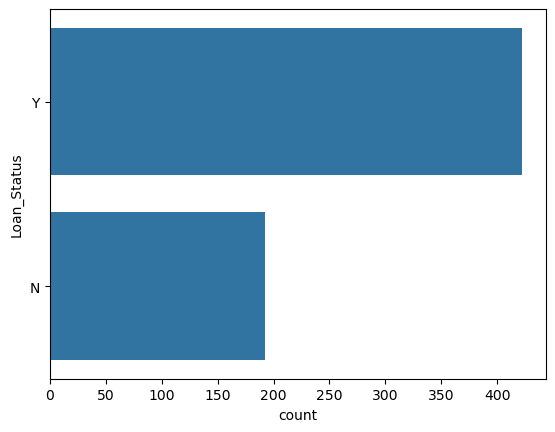

In [11]:
sns.countplot(df["Loan_Status"])

<Axes: xlabel='LoanAmount', ylabel='ApplicantIncome'>

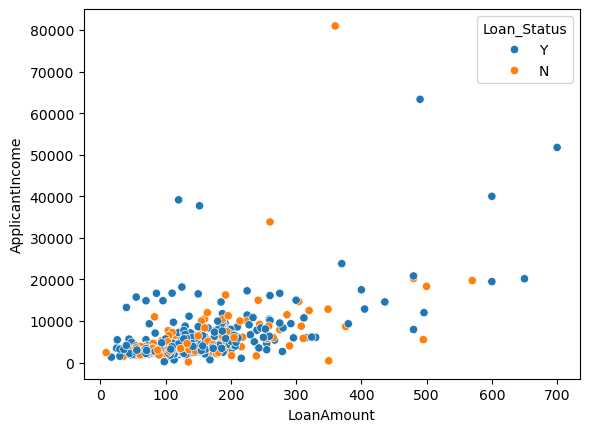

In [12]:
sns.scatterplot(data = df, y = "ApplicantIncome", x = "LoanAmount", hue = "Loan_Status")

<Axes: xlabel='Self_Employed', ylabel='ApplicantIncome'>

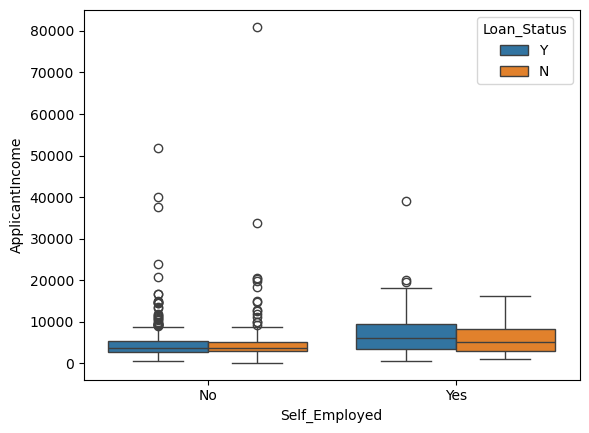

In [13]:
sns.boxplot(data = df, x = "Self_Employed", y = "ApplicantIncome", hue = "Loan_Status")

<Axes: xlabel='Dependents', ylabel='Loan_Status'>

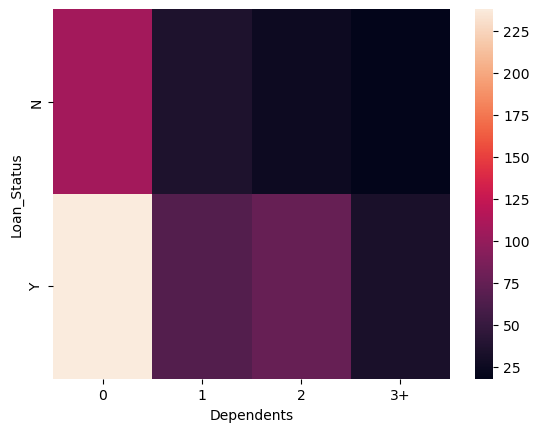

In [14]:
sns.heatmap(pd.crosstab(df['Loan_Status'], df['Dependents']))

<Axes: ylabel='count'>

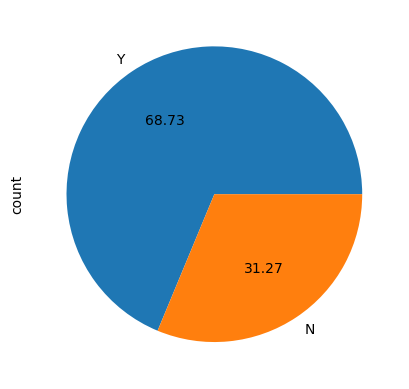

In [15]:
df["Loan_Status"].value_counts().plot(kind = "pie", autopct = "%.2f")

<Axes: xlabel='Property_Area', ylabel='Loan_Status'>

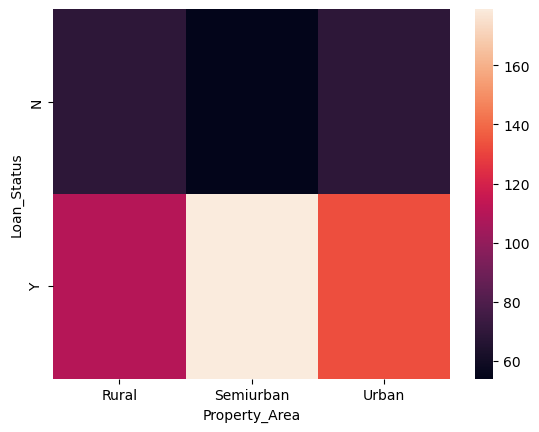

In [16]:
sns.heatmap(pd.crosstab(df['Loan_Status'], df['Property_Area']))

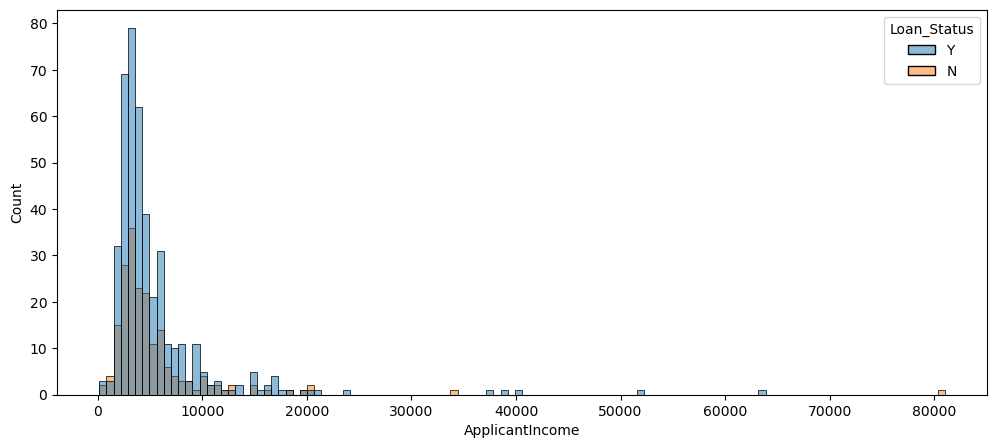

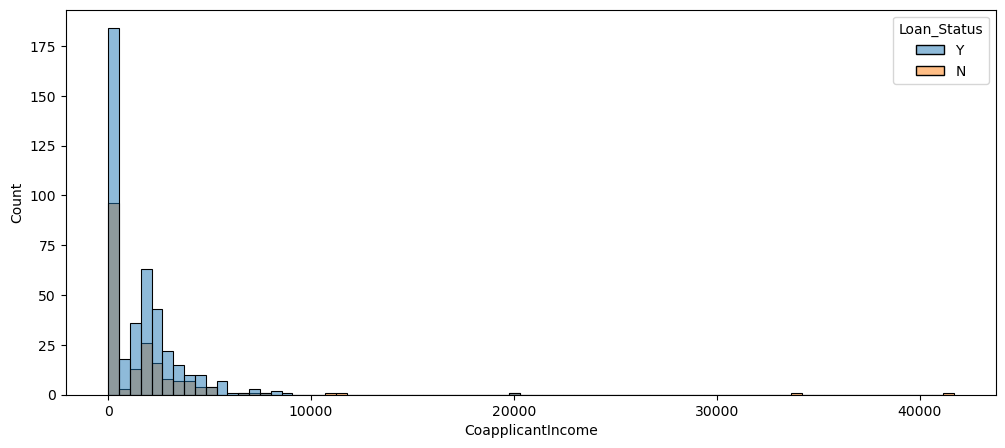

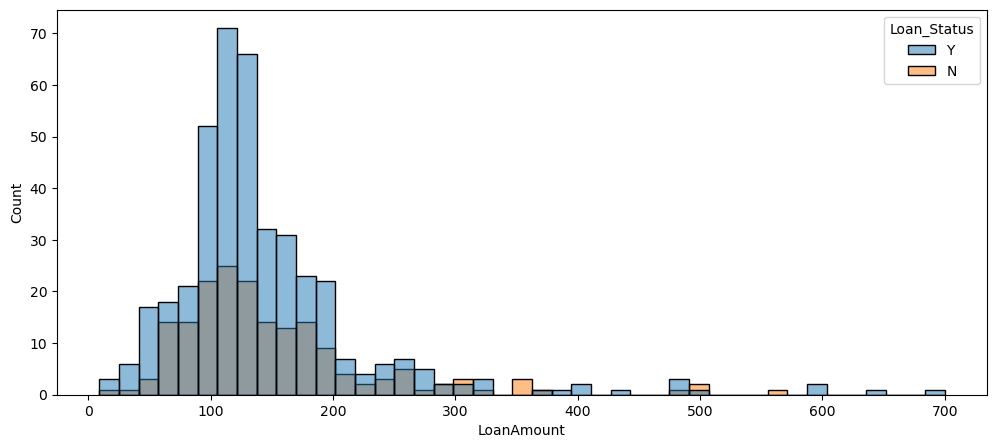

In [17]:
for col2 in ["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]:

   plt.figure(figsize=(12, 5))
   sns.histplot(data=df, x=col2, hue='Loan_Status')



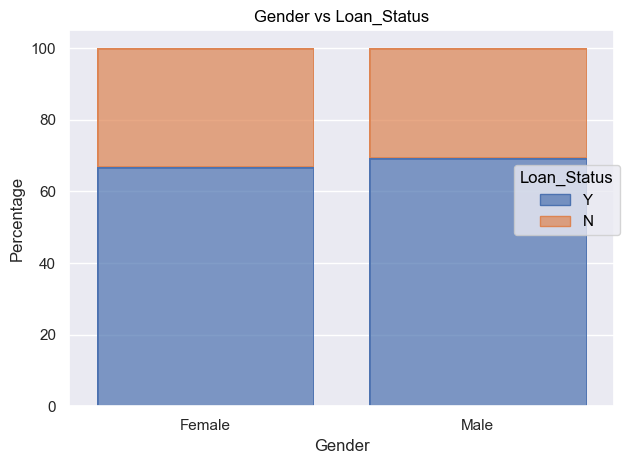

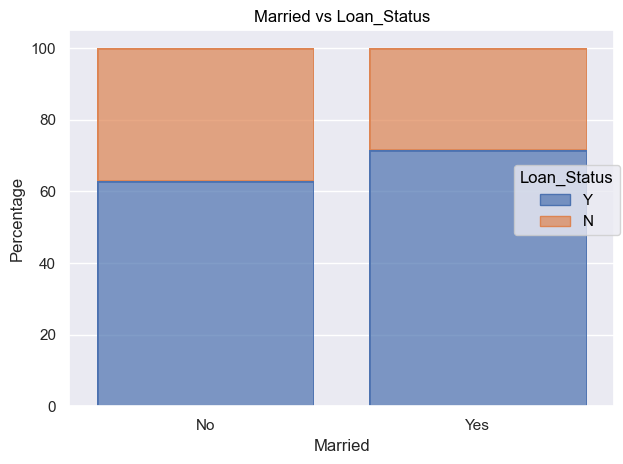

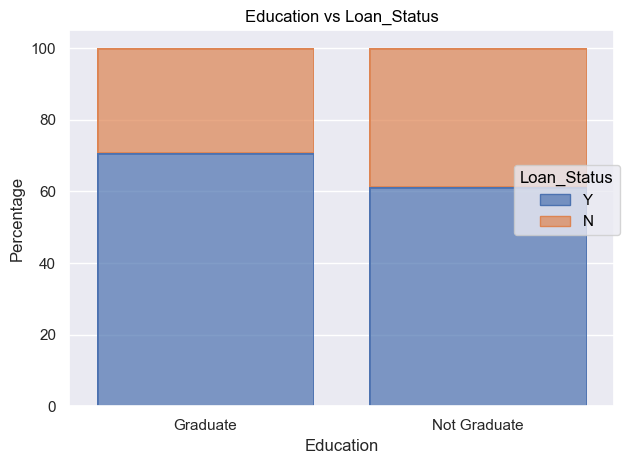

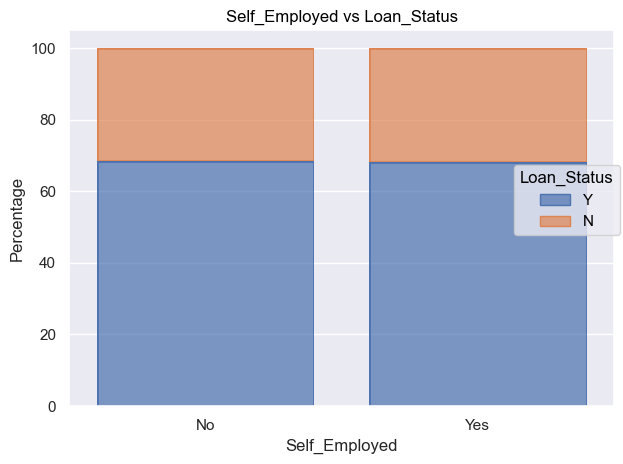

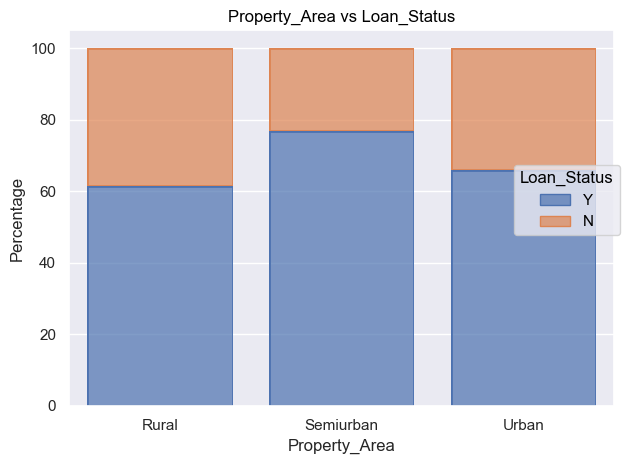

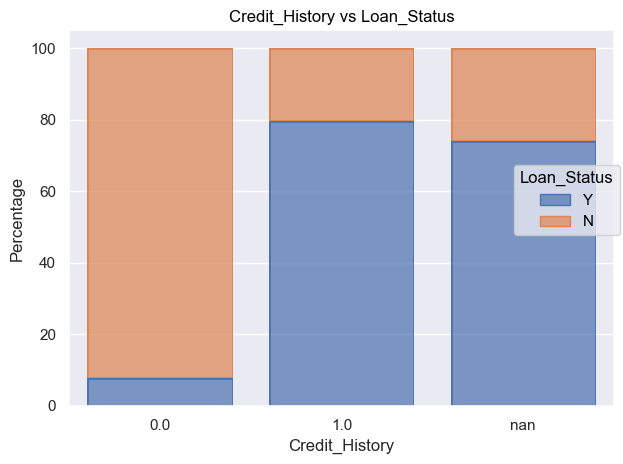

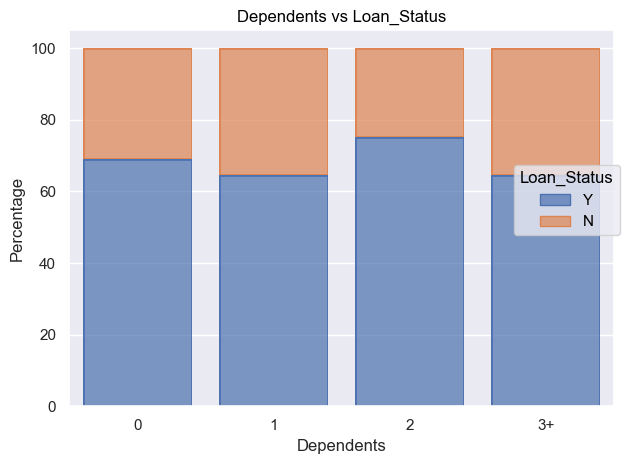

In [19]:
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', "Credit_History", "Dependents"]:
    ct = pd.crosstab(df[col], df['Loan_Status'], normalize = 'index')*100
    ct = ct[['Y', 'N']]
    ct = ct.reset_index().melt(id_vars=col, var_name='Loan_Status', value_name='Percentage')
    so.Plot(ct, x = col, y = "Percentage", color = "Loan_Status").add(so.Bar(), so.Stack()).label(title=f"{col} vs Loan_Status").show()


<Figure size 1200x600 with 0 Axes>

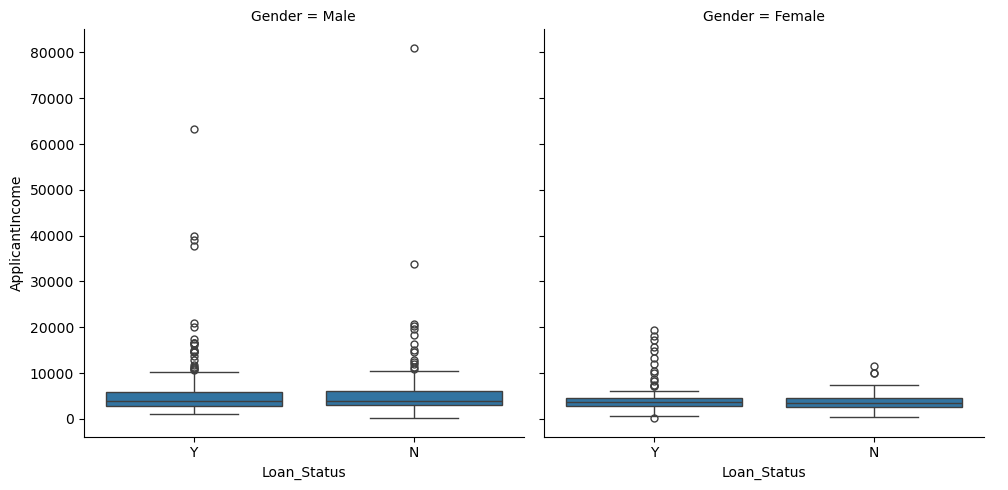

In [20]:
plt.figure(figsize=(12, 6))
sns.catplot(data=df, kind='box', x='Loan_Status', y='ApplicantIncome', col='Gender')

Feature Engineering

In [21]:
df = df.drop(["Loan_ID"], axis=1)

Missing Data

In [23]:
X = df.drop(columns = ["Loan_Status"])
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 2)

nan_cols = ['Credit_History', 'Loan_Amount_Term']  

for col in nan_cols:
    X_train[col] = X_train[col].replace('nan', np.nan)
    X_test[col] = X_test[col].replace('nan', np.nan)

si_mode = SimpleImputer(strategy='most_frequent')
si_median = SimpleImputer(strategy='median')
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']


X_train[categorical_cols] = si_mode.fit_transform(X_train[categorical_cols])
X_train[['LoanAmount']] = si_median.fit_transform(X_train[['LoanAmount']])

X_test[categorical_cols] = si_mode.transform(X_test[categorical_cols])
X_test[['LoanAmount']] = si_median.transform(X_test[['LoanAmount']])



In [24]:
X_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [25]:
df.duplicated().sum()

0

Outliers

In [26]:
def cap_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR 
        upper_bound = Q3 + 1.5 * IQR 
        df[col] = df[col].clip(lower = lower_bound, upper = upper_bound)
    return df 

cap_outliers(X_train, ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'])

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
222,Male,No,0,Graduate,No,2971.00,2791.00,144.00,360.0,1.0,Semiurban
281,Male,Yes,0,Graduate,No,3927.00,800.00,112.00,360.0,1.0,Semiurban
372,Male,Yes,2,Graduate,Yes,9323.00,5628.75,252.25,300.0,1.0,Rural
32,Male,No,1,Graduate,Yes,4692.00,0.00,106.00,360.0,1.0,Rural
204,Male,Yes,2,Not Graduate,No,3917.00,0.00,124.00,360.0,1.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...
534,Female,No,0,Not Graduate,Yes,9954.75,0.00,125.00,360.0,1.0,Urban
584,Male,Yes,1,Graduate,No,2787.00,1917.00,146.00,360.0,0.0,Rural
493,Female,No,0,Not Graduate,Yes,9954.75,0.00,225.00,360.0,1.0,Semiurban
527,Male,Yes,1,Not Graduate,No,5285.00,1430.00,161.00,360.0,0.0,Semiurban


Adding features

In [27]:
X_train['Loan_Amount_Term'] = X_train['Loan_Amount_Term'].astype('float')
X_train['Credit_History'] = X_train['Credit_History'].astype('float')
X_test['Loan_Amount_Term'] = X_test['Loan_Amount_Term'].astype('float')
X_test['Credit_History'] = X_test['Credit_History'].astype('float')



In [28]:
X_train["income_per_loan"] = (X_train['ApplicantIncome'] + X_train['CoapplicantIncome'])/X_train['LoanAmount']
X_test["income_per_loan"] = (X_test['ApplicantIncome'] + X_test['CoapplicantIncome'])/X_test['LoanAmount']

X_test['total_income'] = X_test['ApplicantIncome'] + X_test['CoapplicantIncome']
X_train['total_income'] = X_train['ApplicantIncome'] + X_train['CoapplicantIncome']

X_train['loan_per_unit'] = X_train['LoanAmount']/X_train['Loan_Amount_Term']
X_test['loan_per_unit'] = X_test['LoanAmount']/X_test['Loan_Amount_Term']
X_train['incomexhistory'] = (X_train['ApplicantIncome'] + X_train['CoapplicantIncome']) * X_train['Credit_History']
X_test['incomexhistory'] = (X_test['ApplicantIncome'] + X_test['CoapplicantIncome']) * X_test['Credit_History']
X_train.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,income_per_loan,total_income,loan_per_unit,incomexhistory
376,Male,Yes,3+,Graduate,No,8750.0,4996.0,130.0,360.0,1.0,Rural,105.738462,13746.0,0.361111,13746.0
160,Male,Yes,0,Not Graduate,No,1863.0,1041.0,98.0,360.0,1.0,Semiurban,29.632653,2904.0,0.272222,2904.0
550,Male,Yes,2,Graduate,Yes,6633.0,0.0,128.0,360.0,0.0,Rural,51.820312,6633.0,0.355556,0.0
318,Female,No,1,Graduate,No,3541.0,0.0,112.0,360.0,1.0,Semiurban,31.616071,3541.0,0.311111,3541.0
214,Male,Yes,0,Graduate,No,3173.0,3021.0,137.0,360.0,1.0,Urban,45.211679,6194.0,0.380556,6194.0


Transforms

C:\Users\nimes.DESKTOP-L78OJ71\AppData\Local\Temp\ipykernel_1572\3611514017.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['ApplicantIncome'])


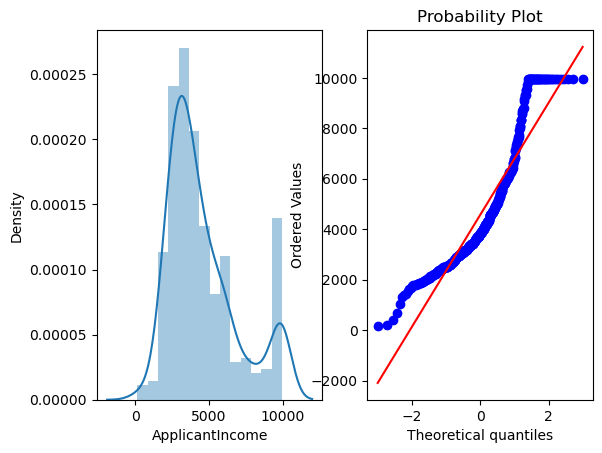

In [ ]:

plt.subplot(121)
sns.distplot(X_train['ApplicantIncome'])
plt.subplot(122)
stats.probplot(X_train['ApplicantIncome'], dist="norm", plot=plt)
plt.show()

C:\Users\nimes.DESKTOP-L78OJ71\AppData\Local\Temp\ipykernel_1572\2317770958.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['CoapplicantIncome'])


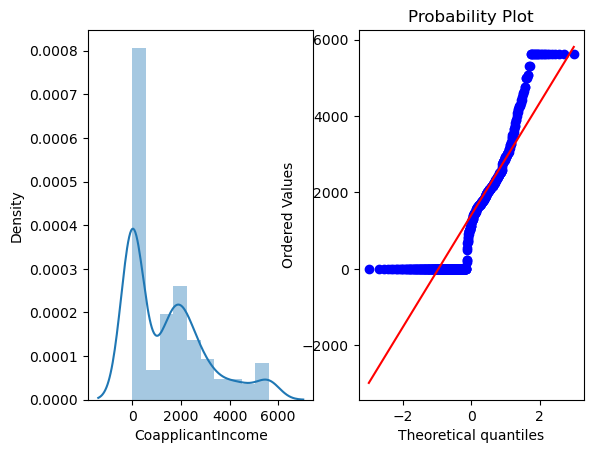

In [30]:
plt.subplot(121)
sns.distplot(X_train['CoapplicantIncome'])
plt.subplot(122)
stats.probplot(X_train['CoapplicantIncome'], dist="norm", plot=plt)
plt.show()

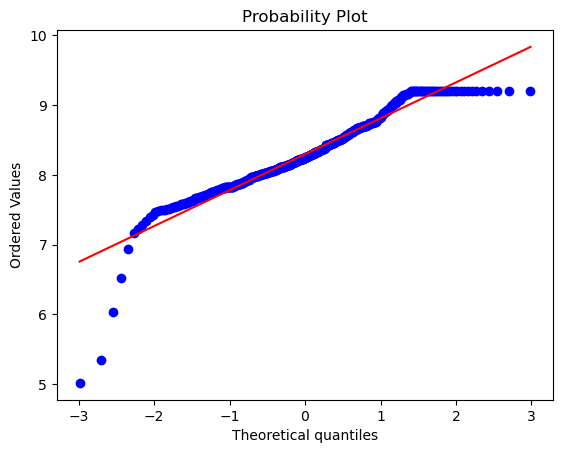

In [31]:
X_train_logged = X_train.copy()
X_train_logged['ApplicantIncome'] = np.log1p(X_train['ApplicantIncome'])
stats.probplot(X_train_logged['ApplicantIncome'], dist="norm", plot=plt)
X_test_logged = X_test.copy()
X_test_logged['ApplicantIncome'] = np.log1p(X_test['ApplicantIncome'])


Encoding

In [79]:
onehot_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed']
ordinal_cols = ['Education', 'Property_Area']
ordinal_categories = [
    ['Not Graduate', 'Graduate'],  
    ['Semiurban', 'Urban', 'Rural']
]

ohe = OneHotEncoder(drop='first', dtype=int, handle_unknown='ignore')
ord_enc = OrdinalEncoder(categories=ordinal_categories, dtype=int)

preprocessor = ColumnTransformer(transformers=[
    ('ohe', ohe, onehot_cols),
    ('ord', ord_enc, ordinal_cols)
], remainder='passthrough')

pipe = Pipeline([
    ('prep', preprocessor),
    
    ('model', RandomForestClassifier(random_state=42))
])

Hyperparameter tuning

In [37]:
from sklearn.model_selection import GridSearchCV

In [57]:
n_estimators = [20, 60, 100, 120]
max_features = [0.2, 0.6, 1]
max_depth = [2, 8 , None]
max_samples = [0.5, 0.75, 1]

param_grid = {"model__n_estimators" : n_estimators, "model__max_features" : max_features, "model__max_depth" : max_depth, "model__max_samples" : max_samples}
modelgrid = GridSearchCV(estimator=pipe, param_grid=param_grid, n_jobs=-1, scoring = "accuracy")

modelgrid.fit(X_train_logged, y_train)

c:\Users\nimes.DESKTOP-L78OJ71\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(drop='first',
                                                                                       dtype=<class 'int'>,
                                                                                       handle_unknown='ignore'),
                                                                         ['Gender',
                                                                          'Married',
                                                                          'Dependents',
                                                                          'Self_Employed']),
                                                                        ('ord',
                                                                         OrdinalEncoder(categories=[['Not '
                                                                                                     'Graduate',
                                                                                                     'Graduate'],
                                                                                                    ['Semiurban',
                                                                                                     'Urban',
                                                                                                     'Rural']],
                                                                                        dtype=<class 'int'>),
                                                                         ['Education',
                                                                          'Property_Area'])])),
                                       ('model',
                                        RandomForestClassifier(max_depth=8,
                                                               max_features=0.6,
                                                               max_samples=0.5,
                                                               n_estimators=120,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [2, 8, None],
                         'model__max_features': [0.2, 0.6, 1],
                         'model__max_samples': [0.5, 0.75, 1],
                         'model__n_estimators': [20, 60, 100, 120]},
             scoring='accuracy')

In [59]:
modelgrid.best_params_

{'model__max_depth': 8,
 'model__max_features': 0.6,
 'model__max_samples': 0.5,
 'model__n_estimators': 120}

In [60]:
modelgrid.best_score_

0.8269016697588126

this 0.82 accuracy on the training data gave only 0.75 accuracy in the unseen test data so I decided to stay with the original parameters

Predict

In [81]:
pipe.fit(X_train_logged, y_train)
y_pred = pipe.predict(X_test_logged)
y_pred

array(['N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'Y'], dtype=object)

In [82]:
accuracy_score(y_test, y_pred)

0.7804878048780488